In the beginning, there was nothing.  And the coder spake 'Let There Be Pandas, and some space for other modules I guess."

And it was good.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import binom_test

But his Pandas were lonely, for they existed alone in the void.  And so on the second coding segment, the coder did summon csvs, that dataframes might be fruitful and multiply, filling his notebook with data and plenty.

And this too was good.

In [2]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

Annnnnd...  this is where the Biblical stuff ends and the serious stuff begins, I'm afraid.

So welcome to my notebook where I look at biodiversity in what seems to be US National Parks.  As of the first draft of this section, I'm starting with two spreadsheets worth of data.  One with info on species, and the other on observations.  Now, I've already taken a look at the data in spreadsheet form, but let's take a peak at it in dataframe form.

In [3]:
print(observations.head(10))
print(species.head(10))
print(species.conservation_status.unique())
print(observations.park_name.unique())
print(species.category.unique())
print(observations.describe(include='all'))
print(species.describe(include='all'))

                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7       

The fact that scientific names seem to be usable up to three times troubles me a little bit.  So we'll take a look at what they look like, in both of them, and do a bit of research on whether or not they can be treated as the same animal.

In [4]:
trios_prep = species.groupby(by='scientific_name').size().reset_index()
#print(trios_prep)
trios = trios_prep[trios_prep[0] == 3]['scientific_name']
#print(trios)
#print(type(trios))
trio = []
for name in range(len(trios)):
    trio.append(trios.iloc[name])
print(trio)
#print(species[species['scientific_name'].isin(trio)])
for animal in trio:
    print('\n'+str(animal))
    print(species[species['scientific_name']==animal])
    print(observations[observations['scientific_name']==animal])
    


['Canis lupus', 'Castor canadensis', 'Columba livia', 'Holcus lanatus', 'Hypochaeris radicata', 'Myotis lucifugus', 'Procyon lotor', 'Puma concolor', 'Streptopelia decaocto']

Canis lupus
     category scientific_name     common_names conservation_status
8      Mammal     Canis lupus        Gray Wolf          Endangered
3020   Mammal     Canis lupus  Gray Wolf, Wolf         In Recovery
4448   Mammal     Canis lupus  Gray Wolf, Wolf          Endangered
      scientific_name                            park_name  observations
1294      Canis lupus               Yosemite National Park            35
1766      Canis lupus                  Bryce National Park            27
7346      Canis lupus                  Bryce National Park            29
9884      Canis lupus                  Bryce National Park            74
10190     Canis lupus  Great Smoky Mountains National Park            15
10268     Canis lupus            Yellowstone National Park            60
10907     Canis lupus            

Research says that scientific names are unique.  And looking at this seems to confirm, as the common names are, for the most part, exactly the same.  There's only one wrinkle when it comes to condensing all of these.  Namely, it looks like conservation status is not always the same, despite the name being similar.  And since there's no discernable difference between the different kinds of canis lupus in the observations data, it looks like we're gonna have to fudge things.  The current plan is, when I get around to it, writing something to do a proper condensation and then divide the total observations by park by the appropriate proportions.  Fortunately, we're looking at at worst halves or thirds.

Likely the best way to do this is to maybe just make a dataframe with the scientific names and status, and then...  what?  Make separate observation columns for each scientific name and status and as I make the columns have it check the cleaned species list in order to see what the proportion of that status is, and then divide the observations by that amount?  That seems doable.

Let's also use this space to start planning out the project.  Primarily useful bits of data seem to be endangered status, classification, and distributions over four different national parks.  As part of this, despite not being able to find any information about what Observations even means, I'm running with the assumption that it means unique objects of that scientific name recorded in the park.

A focus on endangered status runs into the issue of just how few of them there are.  191 out of 5540 species.  This falls short of 4% of them, which means any investigation of them putting the healthy species on the same chart are likely to see them swamped.  That said, observations involving boxplots could work, to show overall and location specific distributions.  Same with classifications.  Another distinct possibility is to use bar charts to look at each specific status and break it down by location and classification, see if either of them show an unexpected result.  Or, I can get the numbers first and then see how they work in terms of charting them, though the methods of displaying them should lead to figuring out how to get the numbers.

I'm also curious to see how the clasifications will spread out over the locations.  Seeing whether any location will of necessity lean towards any specific classification.

As for names, common ones will likely be removed from the files I'll be working with.  They seem to be too inconsistant to be usable or even to easily clean.  And the one to one nature of the scientific names means that they'll provide for a nice clean identifier for analysis.  The original dataframe with common names will be kept though, just so that I can easily grab any names I want for examples when preparing the slide presentation at the end.  After all, not many folks know the procyon lotor, but everyone knows the racoon.

So yeah,
Scientific Name: Index
Category, Location, Conservation Status: Variables to explore
Obervations: The quantifiable variable that will shift between the above three variables to make the core of my analysis.

General thoughts for cleaning:
First, check and see if there's any nulls besides the 'Healthy' status.  Didn't look like it at first glance, but won't hurt to make sure.
Secondly, species needs it's null to be replaced by a 'Healthy' status.  Just to tidy things up a bit.
Thirdly, observations needs to be reworked a fair bit.  Collapse it all by scientific name and location.  Add on classification and then add on status.  (Go with original 5 columns?  Or just one with a list of the different statuses?  5 columns seems better, just account for it once and then don't need to do the calculations every time I think of something new to do with 'em.)

In [5]:
#Ceaning begins here.
#Doublechecking to ensure there's only the one column with nulls, and then filling them with the variable 'Healthy'
print(species.isnull().any())
print(observations.isnull().any())
species['conservation_status'].fillna(value='Healthy', inplace=True)

#Modifying observations to be ready for data analysis.
observations = observations.groupby(by=['scientific_name', 'park_name']).sum().reset_index()
#classes = species[['scientific_name', 'category']]
#print(observations.dtypes)
#print(classes.head())
#observations = observations.merge(classes, on='scientific_name')
#As it turns out, later work on made all of this redundant.  However, let's write it off as a learning experience and leave it here in the ruins of my code.

#Categorizing the conservation status and making a condensed species dataframe
print(species['conservation_status'].unique())
conditions = ['Healthy', 'In Recovery', 'Species of Concern', 'Threatened', 'Endangered']
species['conservation_status']=pd.Categorical(species['conservation_status'], conditions)
species['conservation_codes'] = species['conservation_status'].cat.codes
clean_species = species.drop(columns=['conservation_status', 'common_names'])
clean_species = clean_species.groupby(by=['scientific_name', 'category'], observed=True).max().reset_index()

clean_species['conservation_status']=clean_species['conservation_codes'].apply(lambda x: conditions[x])
observations = observations.merge(clean_species, on='scientific_name')
print(observations.head(10))


category               False
scientific_name        False
common_names           False
conservation_status     True
dtype: bool
scientific_name    False
park_name          False
observations       False
dtype: bool
['Healthy' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
  scientific_name                            park_name  observations  \
0   Abies bifolia                  Bryce National Park           109   
1   Abies bifolia  Great Smoky Mountains National Park            72   
2   Abies bifolia            Yellowstone National Park           215   
3   Abies bifolia               Yosemite National Park           136   
4  Abies concolor                  Bryce National Park            83   
5  Abies concolor  Great Smoky Mountains National Park           101   
6  Abies concolor            Yellowstone National Park           241   
7  Abies concolor               Yosemite National Park           205   
8   Abies fraseri                  Bryce National Park          

In [6]:
#Messing around to get my function to work right here
#print(test_observations.describe())
#Canis lupus
print(observations.describe(include='all'))

        scientific_name                            park_name  observations  \
count             22164                                22164  22164.000000   
unique             5541                                    4           NaN   
top     Carex atherodes  Great Smoky Mountains National Park           NaN   
freq                  4                                 5541           NaN   
mean                NaN                                  NaN    149.555089   
std                 NaN                                  NaN     81.421299   
min                 NaN                                  NaN      9.000000   
25%                 NaN                                  NaN     88.000000   
50%                 NaN                                  NaN    129.000000   
75%                 NaN                                  NaN    217.000000   
max                 NaN                                  NaN    805.000000   

              category  conservation_codes conservation_status 

Alright, data is now cleaned and in a useable form.  Let's break down some data.  Since our focus is on endangered species, we'll want to look at categories and locations both as a whole, and then by each category to see if there's any significant changes in the categories.  We'll do this both for variety of species, as well as whole numbers.  After this is done, I want to have boxplots showing what the total observations are for each species in a category.

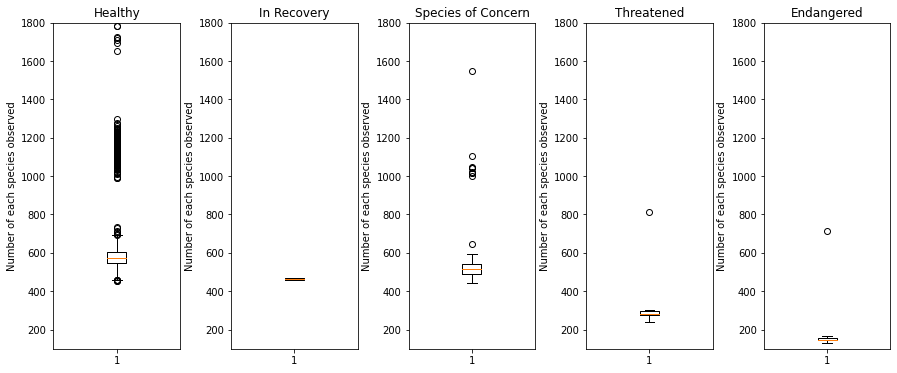

<Figure size 432x288 with 0 Axes>

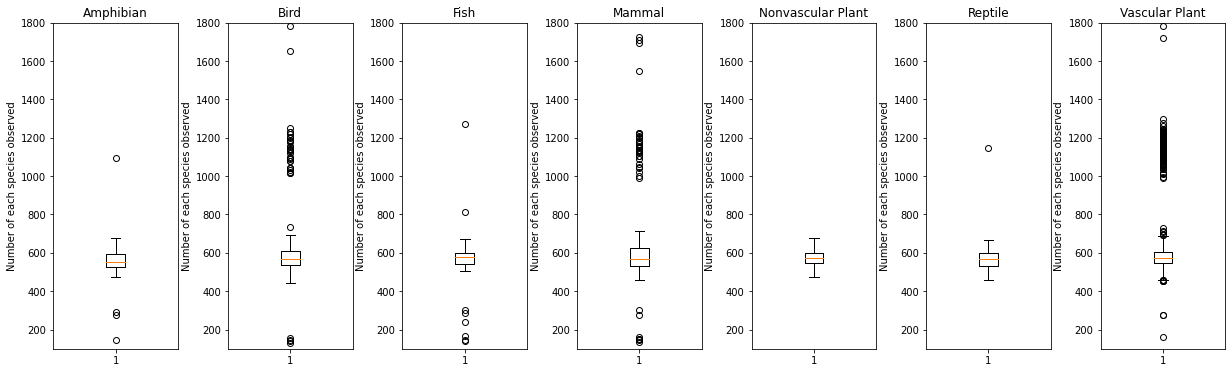

In [7]:
temp_df = observations[['scientific_name', 'observations', 'conservation_status']]
temp_df = temp_df.groupby(by=['scientific_name', 'conservation_status'], observed=True).sum().reset_index()
#print(temp_df.head(10))
fig = plt.figure(figsize=(15, 6))
for x in range(len(conditions)):
    ax = fig.add_subplot(1, 5, x+1)
    plt.boxplot(temp_df[temp_df['conservation_status']==conditions[x]]['observations'])
    plt.title(conditions[x])
    plt.ylabel('Number of each species observed')
    plt.ylim(100, 1800)

plt.subplots_adjust(wspace=0.4)    
plt.savefig('Conservation Status Summary.png')
plt.show()
plt.clf()
temp_df = observations.groupby(['category', 'scientific_name'])['observations'].sum().reset_index()
categories = temp_df['category'].unique()
fig = plt.figure(figsize=(21, 6))
for x in range(len(categories)):
    ax=fig.add_subplot(1, len(categories), x+1)
    plt.boxplot(temp_df[temp_df['category']==categories[x]]['observations'])
    plt.title(categories[x])
    plt.ylabel('Number of each species observed')
    plt.ylim(100, 1800)

plt.subplots_adjust(wspace=0.4)
plt.savefig('Category Status Scatter.png')
plt.show()

Ok, that's an interesting result.  Healthy and Species of Concern have roughly similar numbers, but Healthy has a lot more outliers.  That said, Healthy also has a lot more numbers in general.  So gut instinct, if I ran a hypothesis test on that the results would be insignificant.  The other three however, are obviously different.  Outside of what looks to be a single outlier, Threatened and Endangered are below the lowest value in any of the other three categories.  And In Recovery looks to fit between the two groups, having some overlap with healthy but minimal with Species of Concern.  It also lacks outliers, which is also curious in itself.

This done, let's move on to firing off the percentages.

In [8]:
def tablemaker_species(side, top):
    temp_df = observations[['scientific_name', top, side]]
    temp_df2 = temp_df.groupby([side, top])['scientific_name'].size().reset_index()
    temp_df2['percent'] = temp_df2.apply(lambda x: (x['scientific_name']/temp_df2[temp_df2[top]==x[top]]['scientific_name'].sum())*100, axis=1).round(2)
    temp_percents = temp_df2.pivot(index=side, columns=top, values='percent').reset_index()
    temp_percents = temp_percents.fillna(value=0)
    temp_totals = temp_df2.pivot(index=side, columns=top, values='scientific_name').reset_index()
    temp_totals = temp_totals.fillna(value=0)
    temp_df = temp_df.groupby(side)['scientific_name'].size().reset_index()
    temp_df.rename(columns={'scientific_name': 'total'}, inplace=True)
    temp_totals = temp_totals.merge(temp_df, on=side)
    temp_df['total'] = temp_df.apply(lambda x: x['total']/temp_df['total'].sum()*100, axis=1).round(2)
    temp_percents = temp_percents.merge(temp_df, on=side)
    #print('\nTotal numbers of {} by {}:'.format(side, top))
    #print(temp_totals)
    print('\nSpecies Percentages of {} by {}:'.format(side, top))
    print(temp_percents)
    return temp_totals, temp_percents

def tablemaker_observations(side, top):
    temp_df = observations[['observations', side, top]]
    temp_df2 = temp_df.groupby([side, top])['observations'].sum().reset_index()
    temp_df2['percent'] = temp_df2.apply(lambda x: (x['observations']/temp_df2[temp_df2[top]==x[top]]['observations'].sum())*100, axis=1).round(2)
    temp_percents = temp_df2.pivot(index=side, columns=top, values='percent').reset_index()
    temp_percents = temp_percents.fillna(value=0)
    temp_totals = temp_df2.pivot(index=side, columns=top, values='observations').reset_index()
    temp_totals = temp_totals.fillna(value=0)
    temp_df = temp_df.groupby(side)['observations'].sum().reset_index()
    temp_df.rename(columns={'observations': 'total'}, inplace=True)
    temp_totals = temp_totals.merge(temp_df, on=side)
    temp_df['total'] = temp_df.apply(lambda x: x['total']/temp_df['total'].sum()*100, axis=1).round(2)
    temp_percents = temp_percents.merge(temp_df, on=side)
    #print('\nTotal observation of {} by {}:'.format(side, top))
    #print(temp_totals)
    print('\nObservational Percentages of {} by {}:'.format(side, top))
    print(temp_percents)
    return temp_totals, temp_percents

category_conservation_species_totals, category_conservation_species_percents = tablemaker_species('category', 'conservation_status')
conservation_category_species_totals, conservation_category_species_percents = tablemaker_species('conservation_status', 'category')
category_conservation_observations_totals, category_conservation_observations_percents = tablemaker_observations('category', 'conservation_status')
conservation_category_observations_totals, conservation_category_observations_percents = tablemaker_observations('conservation_status', 'category')
park_conservation_observations_totals, park_conservation_observations_percents = tablemaker_observations('park_name', 'conservation_status')
#park_category_observations_totals, park_category_observations_percents = tablemaker_observations('park_name', 'category')
conservation_park_observations_totals, conservation_park_observations_percents = tablemaker_observations('conservation_status', 'park_name')
print(conservation_park_observations_totals)


Species Percentages of category by conservation_status:
            category  Endangered  Healthy  In Recovery  Species of Concern  \
0          Amphibian        6.67     1.34          0.0                2.65   
1               Bird       26.67     7.70        100.0               45.03   
2               Fish       20.00     2.13          0.0                2.65   
3             Mammal       40.00     2.72          0.0               14.57   
4  Nonvascular Plant        0.00     6.12          0.0                3.31   
5            Reptile        0.00     1.36          0.0                3.31   
6     Vascular Plant        6.67    78.63          0.0               28.48   

   Threatened  total  
0        20.0   1.43  
1         0.0   8.81  
2        40.0   2.26  
3        20.0   3.18  
4         0.0   6.01  
5         0.0   1.41  
6        20.0  76.92  

Species Percentages of conservation_status by category:
  conservation_status  Amphibian   Bird  Fish  Mammal  Nonvascular Plant  \
0

In [9]:
#Let's make a function to spit out lists of p-values
categories = observations['category'].unique()
locations = observations['park_name'].unique()

def biodiversity_p(status):
    temp_df = observations[['category', 'conservation_status', 'scientific_name']]
    temp_df = temp_df.drop_duplicates()
    temp_list = []
    denominator = len(temp_df)
    sample = len(temp_df.loc[temp_df['conservation_status']==status])
    print('\n{} P-Values by Category'.format(status))
    for category in categories:
        hits = len(temp_df[(temp_df['category']==category) & (temp_df['conservation_status']==status)])
        numerator = len(temp_df.loc[temp_df['category']==category])
        p_val = binom_test(hits, n=sample, p=numerator/denominator)
        temp_list.append(p_val)
        print('{}: {}'.format(category, p_val))
    return temp_list

def location_p(status):
    temp_df = observations[['park_name', 'conservation_status', 'observations']]
    temp_df = temp_df.drop_duplicates()
    temp_list = []
    denominator = temp_df['observations'].sum()
    sample = temp_df[temp_df['conservation_status']==status]['observations'].sum()
    print('\n{} P-Values by Location'.format(status))
    for location in locations:
        hits = temp_df[(temp_df['conservation_status']==status) & (temp_df['park_name']==location)]['observations'].sum()
        numerator = temp_df.loc[temp_df['park_name']==location]['observations'].sum()
        p_val = binom_test(hits, n=sample, p=numerator/denominator)
        temp_list.append(p_val)
        print('{}: {}'.format(location, p_val))
    return temp_list

healthy_p = biodiversity_p('Healthy')
concern_p = biodiversity_p('Species of Concern')
threatened_p = biodiversity_p('Threatened')
endangered_p = biodiversity_p('Endangered')
recovery_p = biodiversity_p('In Recovery')
healthy_loc_p = location_p('Healthy')
concern_loc_p = location_p('Species of Concern')
threatened_loc_p = location_p('Threatened')
endangered_loc_p = location_p('Endangered')
recovery_loc_p = location_p('In Recovery')


Healthy P-Values by Category
Vascular Plant: 0.0028621411429707545
Nonvascular Plant: 0.7302649464300898
Bird: 0.004125471011977343
Amphibian: 0.6864986975806215
Reptile: 0.8167710284769909
Mammal: 0.06144783468904963
Fish: 0.5500725207173845

Species of Concern P-Values by Category
Vascular Plant: 2.6344154118097415e-36
Nonvascular Plant: 0.22686066671586225
Bird: 8.396043252456531e-32
Amphibian: 0.17027635339689848
Reptile: 0.06334637426891224
Mammal: 3.2328476144920994e-09
Fish: 0.5870888049527151

Threatened P-Values by Category
Vascular Plant: 0.00022928387152252705
Nonvascular Plant: 1.0
Bird: 1.0
Amphibian: 0.00847714348718528
Reptile: 1.0
Mammal: 0.0383192921718293
Fish: 4.8768833055449375e-05

Endangered P-Values by Category
Vascular Plant: 1.4344086995698493e-08
Nonvascular Plant: 1.0
Bird: 0.037274587987234355
Amphibian: 0.1937807107944607
Reptile: 1.0
Mammal: 4.0116084066184485e-06
Fish: 0.004262064184372831

In Recovery P-Values by Category
Vascular Plant: 0.0122983594706

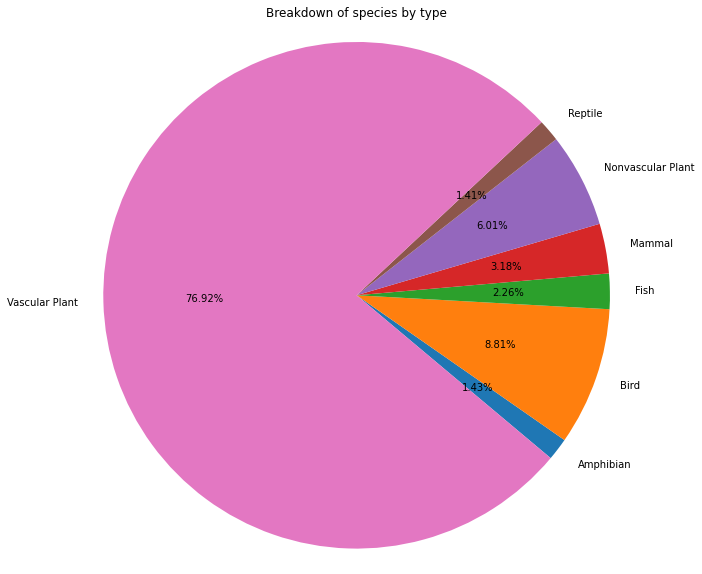

<ipython-input-10-d54c3f84828b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_df['conservation_status'] = pie_df['conservation_status'].replace(['In Recovery', 'Species of Concern', 'Threatened', 'Endangered'], 'Other')


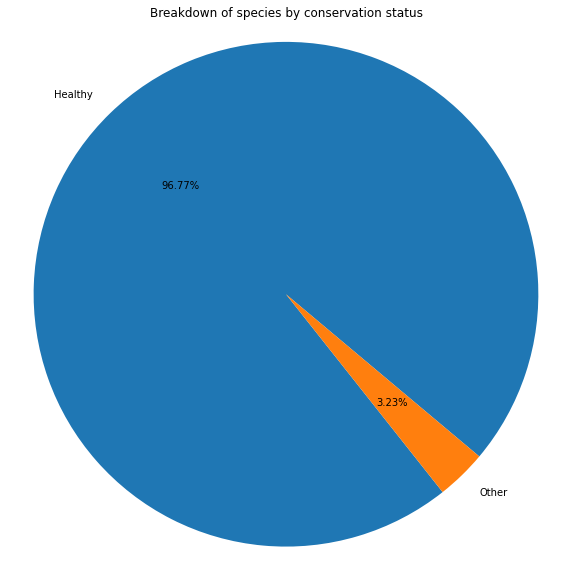

  conservation_status  scientific_name
0             Healthy            21448
1               Other              716


In [10]:
#This section for making piecharts
#First a breakdown by species categorization
pie_df = observations.groupby('category')['scientific_name'].size().reset_index()
fig = plt.figure(figsize=(10, 10))
plt.pie(pie_df['scientific_name'], labels=pie_df['category'], autopct='%0.2f%%', normalize=True, startangle=320)
plt.axis('equal')
plt.title('Breakdown of species by type')
plt.savefig('categories.png')
plt.show()

#Breakdown by species conservation status
pie_df = observations[['conservation_status', 'scientific_name']]
pie_df['conservation_status'] = pie_df['conservation_status'].replace(['In Recovery', 'Species of Concern', 'Threatened', 'Endangered'], 'Other')
pie_df = pie_df.groupby('conservation_status')['scientific_name'].size().reset_index()
fig = plt.figure(figsize=(10, 10))
plt.pie(pie_df['scientific_name'], labels=pie_df['conservation_status'], autopct='%0.2f%%', normalize=True, startangle=320)
plt.axis('equal')
plt.title('Breakdown of species by conservation status')
plt.savefig('Conservation.png')
plt.show()
print(pie_df)

In [11]:
trial_df = observations[['conservation_status', 'scientific_name']]
trial_df['conservation_status'] = trial_df['conservation_status'].replace(['In Recovery', 'Species of Concern', 'Threatened', 'Endangered'], 'Other')
trial_df = trial_df.groupby('conservation_status')['scientific_name'].size().reset_index()
print(trial_df)

  conservation_status  scientific_name
0             Healthy            21448
1               Other              716


<ipython-input-11-d5d6b1663e78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_df['conservation_status'] = trial_df['conservation_status'].replace(['In Recovery', 'Species of Concern', 'Threatened', 'Endangered'], 'Other')


<ipython-input-12-8c4b502de211>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar1['category'] = bar1['category'].replace(['Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile'], 'Fauna')
<ipython-input-12-8c4b502de211>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar1['category'] = bar1['category'].replace(['Vascular Plant', 'Nonvascular Plant'], 'Flora')


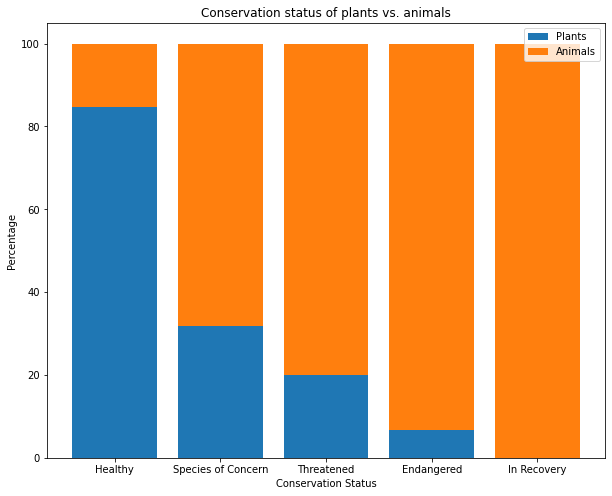

In [12]:
#Set up bargraphs for flora/fauna split
bar1 = observations[['category', 'conservation_status', 'scientific_name']]
bar1['category'] = bar1['category'].replace(['Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile'], 'Fauna')
bar1['category'] = bar1['category'].replace(['Vascular Plant', 'Nonvascular Plant'], 'Flora')
unit_topics = ['Healthy', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery']
taxonomy = ['Plants', 'Animals']
flora = []
fauna = []
for topic in unit_topics:
    flora.append(len(bar1[(bar1['conservation_status']==topic) & (bar1['category']=='Flora')])/len(bar1[bar1['conservation_status']==topic])*100)
    fauna.append(len(bar1[(bar1['conservation_status']==topic) & (bar1['category']=='Fauna')])/len(bar1[bar1['conservation_status']==topic])*100)
x=range(len(unit_topics))

#making flora/fauna barchart
plt.figure(figsize = (10, 8))
plt.bar(x, flora)
plt.bar(x, fauna, bottom = flora)
ax = plt.subplot()
ax.set_xticks(range(len(unit_topics)))
ax.set_xticklabels(unit_topics)
plt.title('Conservation status of plants vs. animals')
plt.xlabel('Conservation Status')
plt.ylabel('Percentage')
plt.legend(taxonomy, loc=1)
plt.savefig('planimal status.png')
plt.show()

In [13]:
#Setting up paired graphs for actual observations and adjusted observations

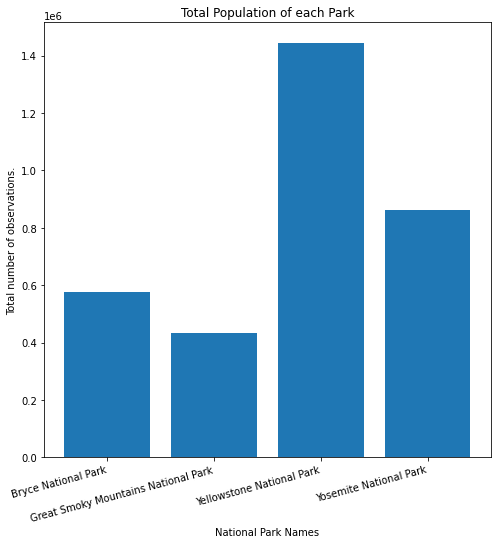

[576025, 431820, 1443562, 863332]


In [14]:
#Bar chart of observed animals in each park
bar2 = observations[['scientific_name', 'park_name', 'observations']]
parks = bar2['park_name'].unique()
populations = []
for park in parks:
    populations.append(bar2[bar2['park_name']==park]['observations'].sum())
x=range(len(parks))

#Making bar chart proper
plt.figure(figsize=(8, 8))
plt.bar(x, populations)
ax=plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(parks, rotation=15, ha='right')
plt.title('Total Population of each Park')
plt.xlabel('National Park Names')
plt.ylabel('Total number of observations.')
plt.savefig('Park Populations.png')
plt.show()
print(populations)

In [15]:
# Had some thoughts.  All parks have entries for all species, but are there observations for all of them?
print(len(observations[observations['observations']==0]))
for park in parks:
    print(park + ': ' + str(observations[observations['park_name']==park]['observations'].mean()) + ', ' + str(observations[observations['park_name']==park]['observations'].median()))

#As it turns out, yes.  There's a minimum observation of 9.    

0
Bryce National Park: 103.95686699151777, 100.0
Great Smoky Mountains National Park: 77.93178126691933, 75.0
Yellowstone National Park: 260.52373217830717, 250.0
Yosemite National Park: 155.80797689947664, 150.0


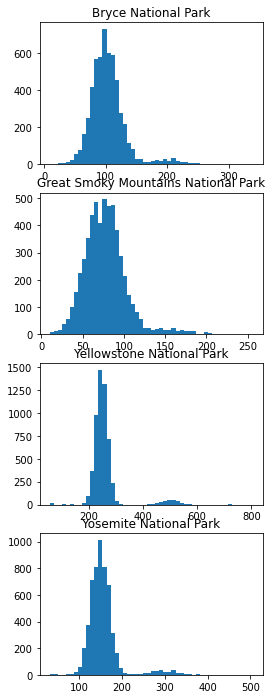

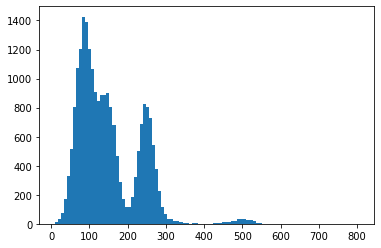

In [16]:
#Curious now, what do the shape of these distributions look like.
fig = plt.figure(figsize=(4, 12))
x=0
for park in parks:
    x+=1
    ax = fig.add_subplot(4, 1, x)
    plt.hist(observations[observations['park_name']==park]['observations'], bins=50)
    plt.title(park)

plt.show()    

plt.hist(observations['observations'], bins=100)
plt.show()

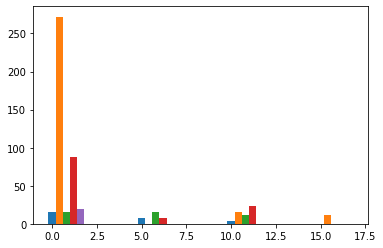

In [53]:
#Bar Chart for different species of animal by conservation status
fauna = ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile']
statuses = ['Species of Concern', 'Threatened', 'Endangered', 'In Recovery']
bar3 = observations.loc[observations['category'].isin(fauna)]
w = 0.4

#Let's make the bar chart
for n in range(len(fauna)):
    temp_x = [5*element + 0.4*n for element in range(len(statuses))]
    temp_values = []
    for status in statuses:
        temp_values.append(len(bar3[(bar3['category']==fauna[n]) & (bar3['conservation_status']==status)]))
    plt.bar(temp_x, temp_values, width=w)


plt.show()

#print(bar3.head())

In [52]:
for n in range(len(fauna)):
    temp_values = []
    for status in statuses:
        temp_values.append(len(bar3[(bar3['category']==fauna[n]) & (bar3['conservation_status']==status)]))
    print(temp_values)

[288, 16, 8, 4, 0]
[1652, 272, 0, 16, 12]
[456, 16, 16, 12, 0]
[584, 88, 8, 24, 0]
[292, 20, 0, 0, 0]
